# Перцептрон

In [1]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# sklearn
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df = pd.read_csv(r"datasets/gender_classification.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [2]:
df['gender'] = np.where(df['gender'] == "Male", 1, 0)
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


Классификация с использованием модели перцептрона:

Неверно классифицированные образцы: 136
Точность: 0.91
Матрица неточности для Perceptron:
[[692  72]
 [ 64 673]]


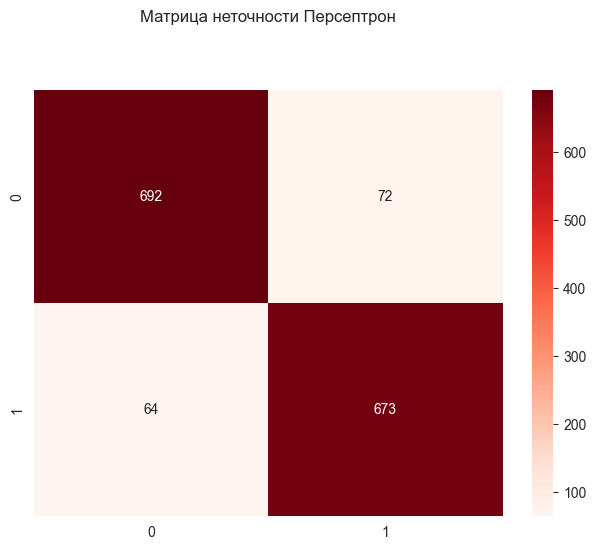

In [3]:
X = df.iloc[:,0:6]
y = df["gender"]

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

ppn = Perceptron(max_iter=100, eta0=0.1, random_state=0)
ppn.fit(X_train,y_train)
y1 = ppn.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test != y1).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

# Матрица неточности для Perceptron
cnf_matrix_ppn = confusion_matrix(y_test, y1)
print("Матрица неточности для Perceptron:")
print(cnf_matrix_ppn)



Модель Perceptron демонстрирует , что она неверно классифицировала 136 образцов. А точность составила 0.91. Матрица неточности более подробно отображает эти ошибки. Например, 72 женщины были классифицированы как мужчины, а 64 мужчины были классифицированы как женщины. 

Многослойный перцептрон: 

Неверно классифицированные образцы: 52
Точность: 0.97

Матрица неточности для MLP:
[[734  30]
 [ 22 715]]


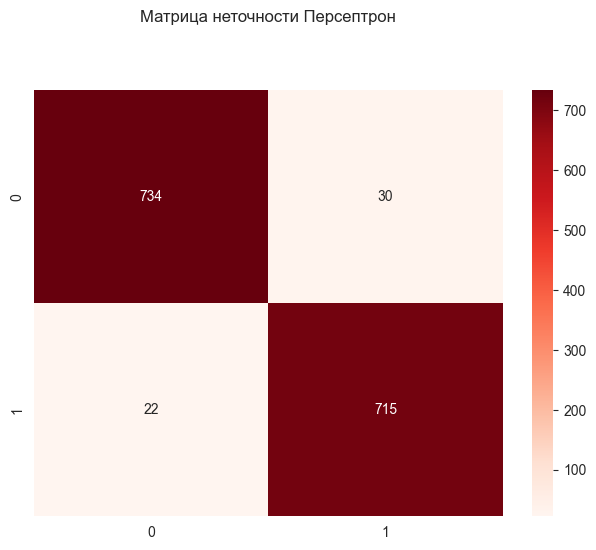

In [4]:
mlp= MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-4, max_iter=10000, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test != mlp_pred).sum())
print('Точность: %.2f' % accuracy_score(y_test, mlp_pred))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, mlp_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

# Матрица неточности для MLP
cnf_matrix_mlp = confusion_matrix(y_test, mlp_pred)
print("\nМатрица неточности для MLP:")
print(cnf_matrix_mlp)


Модель многослойный Perceptron демонстрирует , что она неверно классифицировала 52 образца. А точность составила 0.97. 



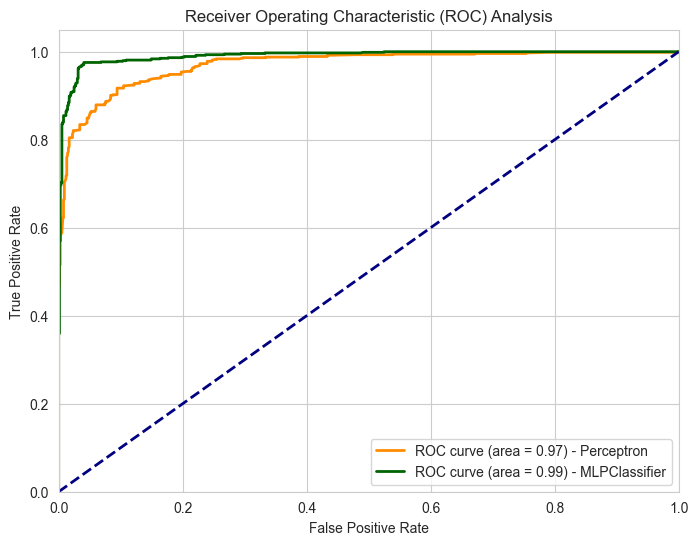

In [5]:
X = df.iloc[:,0:6]
y = df["gender"]

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.metrics import roc_curve, auc

# ROC-анализ для Perceptron
fpr_ppn, tpr_ppn, _ = roc_curve(y_test, ppn.decision_function(X_test))
roc_auc_ppn = auc(fpr_ppn, tpr_ppn)

# ROC-анализ для MLPClassifier
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Построение ROC-кривых
plt.figure(figsize=(8, 6))
plt.plot(fpr_ppn, tpr_ppn, color='darkorange', lw=2, label='ROC curve (area = %.2f) - Perceptron' % roc_auc_ppn)
plt.plot(fpr_mlp, tpr_mlp, color='darkgreen', lw=2, label='ROC curve (area = %.2f) - MLPClassifier' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Analysis')
plt.legend(loc="lower right")
plt.show()


Roc-анализ показывает хорошее качество классификации модели.